<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#CA6F1E;
            overflow:hidden;
            font-weight:700"><span style='color:#283747'></span>"Predicting Insurance Charges." </div>

<!-- Develop a model to predict the insurance charges (**charges**). This model can help the insurance company in setting premiums more accurately. -->

- [1. Load the dataset](#1)

- [2.Exploratory Data Anlysis(EDA)](#2)
    - [2.1 Quick Exploration the dataset](#1.1)
    - [2.2 Data Cleaning](#1.3)
        - [2.3 Missing Values](#1.3.1)
        - [2.3.2 Duplicates](#1.3.2)
        - [2.3.3 Outliters](#1.3.3)
    - [2.3 Deep Exloration of features in Dataset]()

- [3. Diagnostics Analytics](#2.3)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Load the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ManonYa09/Statistics_with_Python_G6/main/Dataset/5.%20insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 2.1 Duplicated

In [8]:
df.duplicated().sum()

1

In [9]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


### 2.2 Outlier

<!-- fig , ax = plt.subplots(1, 3, figsize = (15, 5))
sns.boxplot(y = df['bmi'], ax = ax[0])
ax[0].set_title('Distribution of BMI', fontsize = 14, color = 'r')
ax[0].set_ylabel('bmi', fontsize = 12)

sns.boxplot(y = df['charges'], ax = ax[1])
sns.boxplot(y = df['age'], ax = ax[2])
plt.tight_layout() -->


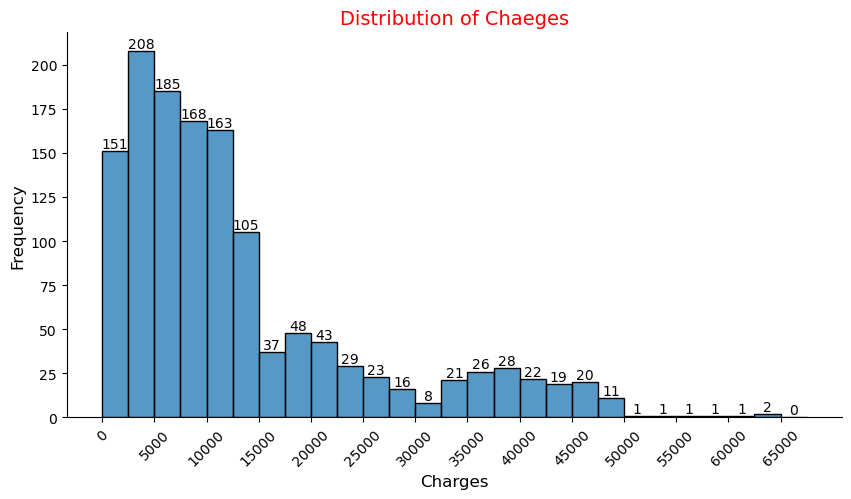

In [28]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.histplot(x = df['charges'], bins =np.arange(0, 70000, 2500))
ax.set_xticks(np.arange(0, 70000, 5000))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax.set_title('Distribution of Chaeges', fontsize = 14, color ='r')
ax.set_xlabel('Charges', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.bar_label(ax.containers[1])
ax.spines[['right', 'top']].set_visible(False)

### 2.3 Dianostics Analysis

In [29]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [43]:
cat_column = []
num_column = []
two_unique = []
for column in df.columns:
    if df[column].nunique()==2:
        two_unique.append(column)
    elif df[column].nunique()<=4:
        cat_column.append(column)
    else:
        num_column.append(column)

In [44]:
two_unique


['sex', 'smoker']

#### 2.3.1 Exploring Categorical Data with Target

In [46]:
df.groupby(two_unique)['charges'].describe()

count          mean           std         min           25%  \
sex    smoker                                                                
female no      547.0   8762.297300   6060.775970   1607.5101   4265.599100   
       yes     115.0  30678.996276  11907.536381  13844.5060  19696.432100   
male   no      517.0   8087.204731   5908.108989   1121.8739   3659.346000   
       yes     159.0  33042.005975  11202.670862  12829.4551  21241.526875   

                       50%          75%          max  
sex    smoker                                         
female no       7639.41745  11786.16660  36910.60803  
       yes     28950.46920  40918.31450  63770.42801  
male   no       6985.50695  10959.33000  32108.66282  
       yes     36085.21900  41797.58905  62592.87309

#### 2.3.2 Exploring Numerical Data with Target

In [ ]:
# sns.pairplot(data = data[num_columns], hue = data['smoker'])

#### age with Target

<!-- fig, ax =plt.subplots(1, 2 , figsize = (16, 6), )
sns.boxplot(y = data['age'], ax =ax[0])
ax[0].set_title('Distribution of Charges')
ax[1].axhline(y = data['charges'].mean(), label = 'Mean of Charges', color = 'r')
ax[1].legend()
sns.scatterplot(x = data['age'], y = data['charges'], hue = data['smoker'], palette="deep", ax = ax[1])
ax[1].set_xticks(np.arange(15, 66, 5))
ax[1].set_xlabel("Age (Years)")
ax[1].set_ylabel("Number of Charges")
ax[1].set_title("Relationship Between Age, Charges, and Smoking Status")
ax[1].legend(title="Smoking Status")
plt.tight_layout()
# plt.savefig('D&Re and Charges.jpg', dpi = 1000)
plt.show() -->

<!-- fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(y=data['bmi'], ax=ax[0])
ax[0].set_title('Distribution of BMI')

# Combined plot for 'charges' vs 'bmi' and 'smoker'
ax[1].axhline(y=data['charges'].mean(), label='Mean of Charges', color='r')
ax[1].legend()
sns.scatterplot(x=data['bmi'], y=data['charges'], hue=data['smoker'], palette="deep", ax=ax[1])
ax[1].set_xlabel("BMI")  # Update label for 'bmi'
ax[1].set_ylabel("Number of Charges")
ax[1].set_title("Relationship Between BMI, Charges, and Smoking Status")
ax[1].legend(title="Smoking Status")

# Adjust layout
plt.tight_layout(rect=(0, 0, 1, 1))
# plt.savefig('bmi.jpg', dpi = 1000)
plt.show() -->

### correlation coefficient

In [32]:
data[['age', 'children', 'bmi','charges']].corr()['charges']

age         0.298308
children    0.067389
bmi         0.198401
charges     1.000000
Name: charges, dtype: float64